In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df=pd.read_csv('/home/simarahmani/Desktop/codes/dataset/wine+quality/winequality-red.csv', sep=';')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [4]:
#sperating Features(x) and target variable(y)
x=df.drop('quality', axis=1)
y=df['quality']

In [5]:
#split data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [6]:
#initialize the decision tree regressor
model=DecisionTreeRegressor(random_state=500)

#train the model
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=500)

In [7]:
#model makes prediction on unseen data
y_pred=model.predict(x_test)

In [8]:
#evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

0.559375
0.14403980932171734


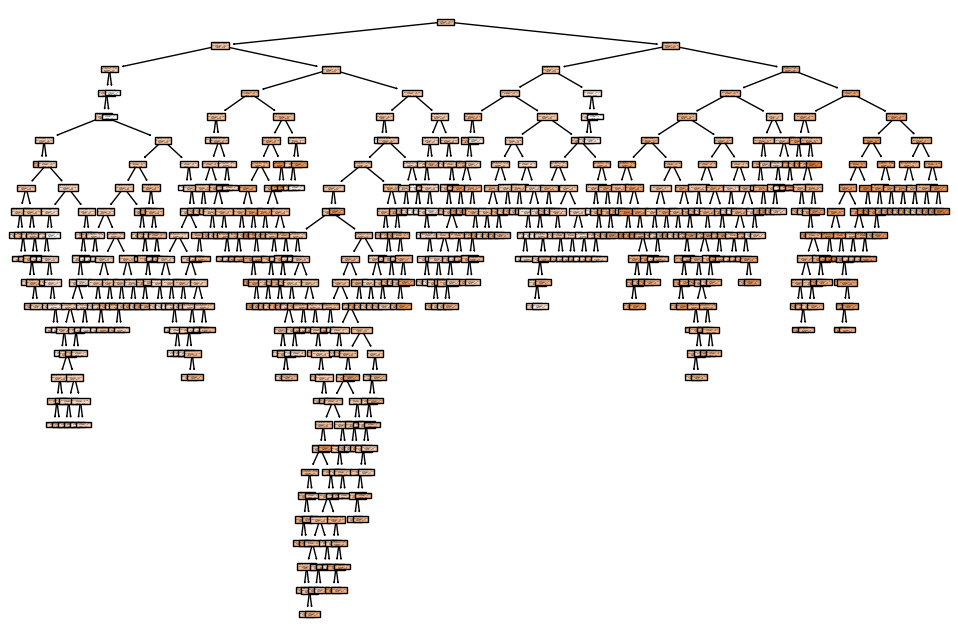

In [9]:
#visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=x.columns)
plt.show()

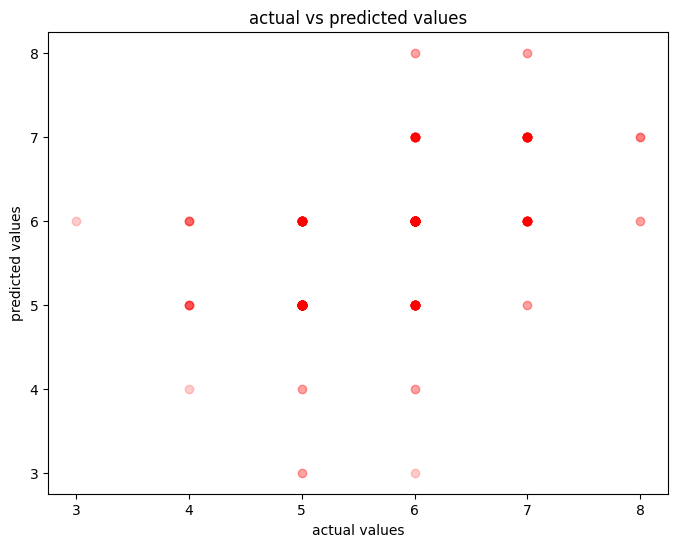

In [10]:
#plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='red', alpha=0.2)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('actual vs predicted values')
plt.show()

In [11]:
#fine-tuning
#define the parameter grid: define a grid of hyperparameters
param_grid={'max_depth':[14,8,10],'min_samples_split':[10, 15, 20], 'min_samples_leaf':[3,6,8], 'max_features':[10, 3, 6]}

#instantiate the grid search with cross-validation
grid_search=GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=7, scoring='neg_mean_squared_error', verbose=1, n_jobs=1)

#fit the grid search to the data
grid_search.fit(x_train,y_train)

#get the best parameters and the best estimator
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

#predict on the test data
y_pred1=best_model.predict(x_test)

#evaluation
mse1=mean_squared_error(y_test,y_pred1)
r2_1=r2_score(y_test,y_pred1)
print(mse1)
print(r2_1)


Fitting 7 folds for each of 81 candidates, totalling 567 fits
0.3996628159484741
0.3884326969452062


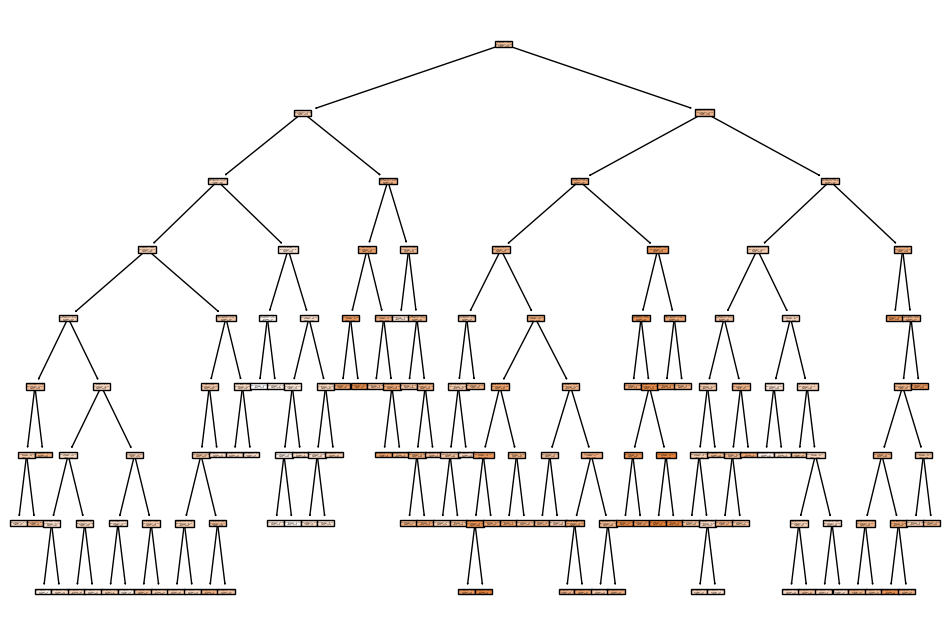

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(best_model, filled=True, feature_names=x.columns)
plt.show()

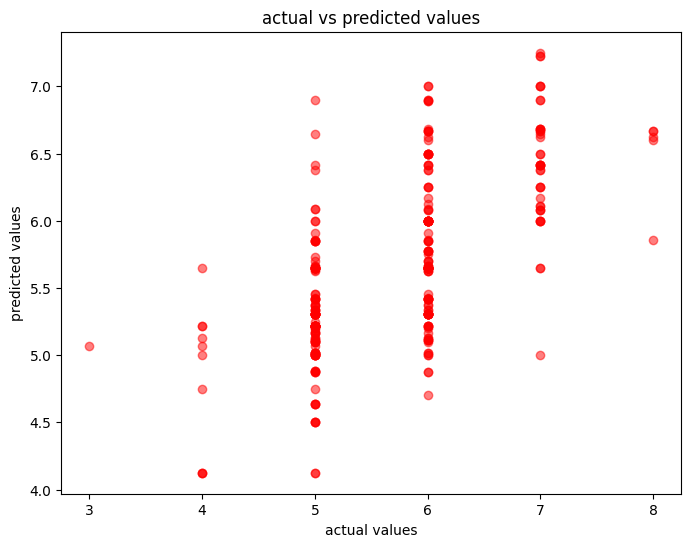

In [13]:
#plot actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred1, color='red', alpha=0.5)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('actual vs predicted values')
plt.show()
